In [6]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
from scipy.optimize import minimize_scalar

In [2]:
with open(f'../../../loss/ResDepth_lr_tuning_loss_v4.pkl', 'rb') as f:
        experiment_data = pickle.load(f)

In [3]:
df = pd.DataFrame.from_dict(
    experiment_data,
    orient='index',
    columns=['learning_rate', 'weight_decay', 'epoch_min_val_loss', 'min_val_loss']
)

In [49]:
df

,learning_rate,weight_decay,epoch_min_val_loss,min_val_loss
0,0.000135,0.000023,64,0.000646
1,0.000412,0.000221,87,0.000639
2,0.000260,0.000032,79,0.000636
3,0.000179,0.000111,75,0.000648
4,0.001417,0.000058,45,0.000901
5,0.000124,0.000060,74,0.000654
6,0.000440,0.000127,94,0.000645
7,0.001181,0.000148,11,0.000904
8,0.000606,0.000027,90,0.000857
9,0.000310,0.000155,99,0.000692


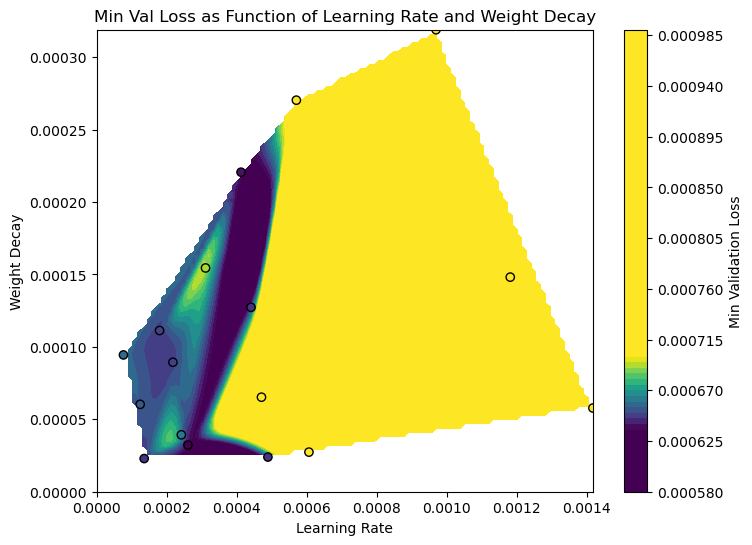

In [4]:
# Extract data
x = df['learning_rate'].values
y = df['weight_decay'].values
z = df['min_val_loss'].values

# Define grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on the grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Contour plot
c = ax.contourf(xi, yi, zi, levels=100, cmap='viridis', vmin=0.000636, vmax=0.0007)

# Overlay scatter points
scatter = ax.scatter(x, y, c=z, cmap='viridis', edgecolor='k', vmin=0.000636, vmax=0.0007)

# Labels and colorbar
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Weight Decay')
ax.set_title('Min Val Loss as Function of Learning Rate and Weight Decay')
ax.set_xlim(0)
ax.set_ylim(0)
fig.colorbar(c, ax=ax, label='Min Validation Loss')

Text(0.5, 1.0, 'Min Validation Loss vs. Learning Rate')

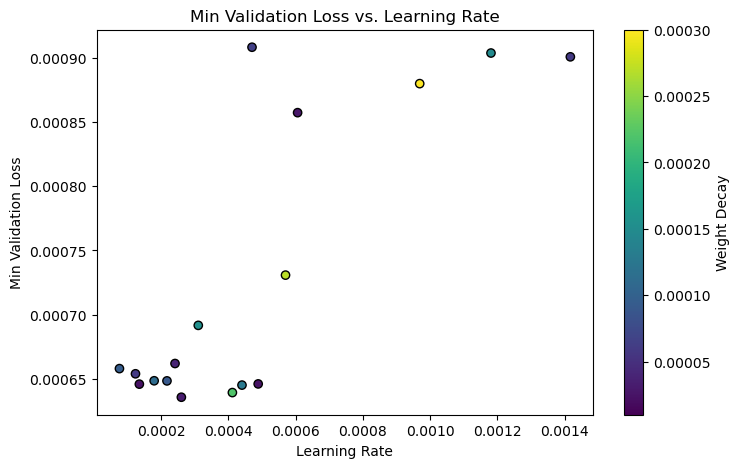

In [12]:
# Extract x and y values
x = df['learning_rate'].values
y = df['min_val_loss'].values

# Fit a cubic polynomial
coeffs = np.polyfit(x, y, deg=2)
poly = np.poly1d(coeffs)

# Generate smooth x values for plotting the fitted curve
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = poly(x_fit)

res = minimize_scalar(poly, bounds=(x.min(), x.max()), method='bounded')
min_x = res.x
min_y = res.fun

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot of data
sc = ax.scatter(x, y, c=df['weight_decay'], edgecolor='k', cmap='viridis', vmin=0.00001, vmax=0.0003)
plt.colorbar(sc, label='Weight Decay')

# # Plot fitted cubic curve
# ax.plot(x_fit, y_fit, color='red', label='Quadratic Fit')

# # Mark the minimum
# ax.plot(min_x, min_y, 'ro', label=f'Min: ({min_x:.5f}, {min_y:.5f})')

# Labels and title
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Min Validation Loss')
ax.set_title('Min Validation Loss vs. Learning Rate')
#ax.legend()

In [34]:
df

,learning_rate,weight_decay,epoch_min_val_loss,min_val_loss
0,0.000135,0.000023,64,0.000646
1,0.000412,0.000221,87,0.000639
2,0.000260,0.000032,79,0.000636
3,0.000179,0.000111,75,0.000648
4,0.001417,0.000058,45,0.000901
5,0.000124,0.000060,74,0.000654
6,0.000440,0.000127,94,0.000645
7,0.001181,0.000148,11,0.000904
8,0.000606,0.000027,90,0.000857
9,0.000310,0.000155,99,0.000692


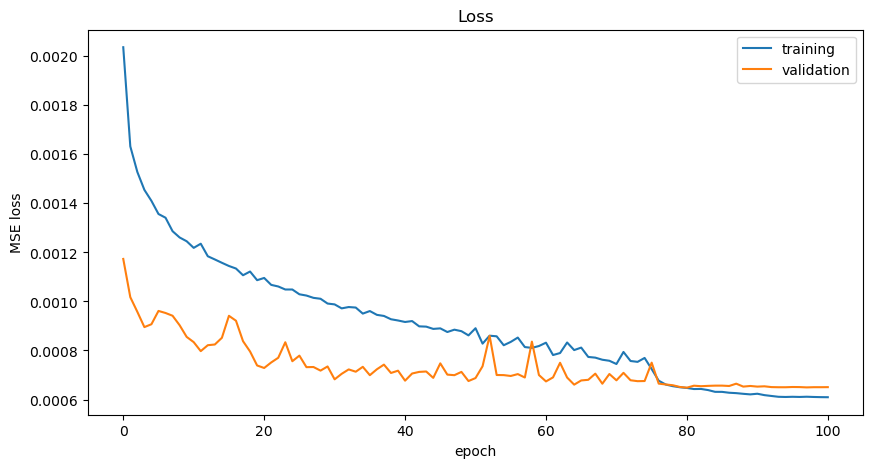

In [46]:
with open(f'../../../loss/ResDepth_lr0.0002172671929309925_weightdecay8.93895336631486e-05_val_loss.pkl', 'rb') as f:
        val_loss = pickle.load(f)

with open(f'../../../loss/ResDepth_lr0.0002172671929309925_weightdecay8.93895336631486e-05_train_loss.pkl', 'rb') as f:
        train_loss = pickle.load(f)


# plot loss over all epochs
f, ax = plt.subplots(figsize=(10,5))
ax.plot(train_loss, label='training')
ax.plot(val_loss, label='validation')
ax.set_xlabel('epoch')
ax.set_ylabel('MSE loss')
ax.set_title('Loss')
ax.legend()

# # save figure
# plt.savefig(f'../../../figs/quinn_ResDepth_v12_loss.png', dpi=300)